In [1]:
from evaluate import load_runs_metadata_table, evaluate_arp, evaluate_replicability, evaluate_result_delta, long_table, table_ARP_statsig, evaluate_reproducibility
from plot import result_table, table_ARP_full, table_RD_DRI, plot_DRI_ER, plot_arp, plot_per_topic_dif, plot_per_topic, plot_per_topic_delta, plot_arp_all

import numpy as np
import pandas as pd

from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare measures

In [2]:
df = load_runs_metadata_table(mode = "-core_queries")
df = evaluate_arp(df, mode = "-core_queries")
df = evaluate_result_delta(df)
df = evaluate_replicability(df, mode = "-core_queries")
df = evaluate_reproducibility(df, mode = "-core_queries")

/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:105: RuntimeWarning: divide by zero encountered in scalar divide
  return (base - advanced) / base
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (base - advanced) / base
/Users/jueri/dev/Temporal-Persistence/.venv/lib/python3.11/site-packages/repro_eval/measure/overall_effects.py:142: RuntimeWarning: invalid value encountered in scalar divide
  yield measure, (mean - mean_scores_b.get(measure)) / mean_scores_b.get(measure)
/Users/jueri/dev/Temporal-Persistence/.venv/lib/python3.11/site-packages/repro_eval/measure/overall_effects.py:82: RuntimeWarning: divide by zero encountered in scalar divide
  yield measure, value / mi_orig.get(measure)
/Users/jueri/dev/Temporal-Persistence/.venv/lib/python3.11/site-packages/repro_eval/measure/overall_effects.py:82: RuntimeWarning: invalid value encountered in scalar divide
  yield measure, value / mi_o

Error in run-longeval-LT-test-bm25-pyterrier not all topics match with BM25 baseline
Error in run-tripclick-test-head-t2-queries-bm25-pyterrier not all topics match with BM25 baseline
Error in run-trec-covid-round3-queries-bm25-pyterrier not all topics match with BM25 baseline
Error in run-trec-covid-round4-queries-bm25-pyterrier not all topics match with BM25 baseline
Error in run-trec-covid-round5-queries-bm25-pyterrier not all topics match with BM25 baseline
Error in run-tripclick-test-head-t3-queries-bm25-pyterrier not all topics match with BM25 baseline
Error in run-trec-covid-round2-queries-bm25-pyterrier not all topics match with BM25 baseline
Error in run-longeval-ST-test-bm25-pyterrier not all topics match with BM25 baseline
Error KTau run-tripclick-test-head-t3-queries-rrf(xsqram__bm25_bo1__pl2)-ranx
Error KTau run-tripclick-test-head-t2-queries-rrf(xsqram__bm25_bo1__pl2)-ranx
Error KTau run-tripclick-test-head-t2-queries-bm25+monot5-pyterrier
Error KTau run-tripclick-test-he

In [5]:
long = long_table(df)
long.head()

,method,subcollection,dataset,variable,value,group,measure
0,MonoT5,round4,trec-covid,ARP_map,0.093,ARP,map
1,MonoT5,ST,longeval,ARP_map,0.155,ARP,map
2,RRF,WT,longeval,ARP_map,0.136,ARP,map
3,d2q,WT,longeval,ARP_map,0.143,ARP,map
4,RRF,round2,trec-covid,ARP_map,0.084,ARP,map


# Significance of ARP results

In [8]:
table_ARP_statsig(df, dataset="longeval", subcollections=["WT", "ST", "LT"], highlight=True, mode="-core_queries")

/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [9]:
table_ARP_statsig(df, dataset="tripclick-test-head", subcollections=["t1", "t2", "t3"], highlight=True, mode="-core_queries")

/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [10]:
table_ARP_statsig(df, dataset="trec-covid", subcollections=["round1", "round2", "round3", "round4", "round5"], highlight=True, mode="-core_queries")

/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/Users/jueri/dev/Temporal-Persistence/evaluation/evaluate.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

# Variance per EE

## ARP variance

In [73]:
arp_var = table_ARP_full(long, highlight=False, save=False)

for col in arp_var.columns:
    if col not in ['measure', 'method']:
        arp_var[col] = pd.to_numeric(arp_var[col], errors='coerce')

arp_var.groupby('measure').var().T

measure                                P_10     bpref       map      ndcg
dataset             subcollection                                        
longeval            LT             0.000029  0.000278  0.000109  0.000116
                    ST             0.000074  0.000151  0.000131  0.000139
                    WT             0.000031  0.000109  0.000134  0.000111
trec-covid          round1         0.001054  0.000176  0.000840  0.000451
                    round2         0.000249  0.000149  0.000150  0.000222
                    round3         0.000549  0.000062  0.000087  0.000097
                    round4         0.002187  0.000044  0.000168  0.000342
                    round5         0.001131  0.000097  0.000043  0.000090
tripclick-test-head t1             0.000035  0.000407  0.000092  0.000087
                    t2             0.000073  0.000263  0.000077  0.000105
                    t3             0.000070  0.000278  0.000099  0.000128

## ER variance

In [13]:
MEASURES = ["ndcg", "bpref", "P_10", "map"]
collumns = [('longeval',     'WT'), 
('longeval',     'ST'),
('longeval',     'LT'),
('tripclick-test-head',     't1'),
('tripclick-test-head',     't3'),
('tripclick-test-head',     't2'),
('trec-covid', 'round1'),
('trec-covid', 'round2'),
('trec-covid', 'round3'),
('trec-covid', 'round4'),
('trec-covid', 'round5')]

er_var = long[(long["group"] == "ER") & (long["measure"].isin(MEASURES))]

er_var = er_var.pivot(
    index=["measure", "method"],
    columns=["dataset", "subcollection"],
    values="value",
    )

for col in er_var.columns:
    if col not in ['measure', 'method']:
        er_var[col] = pd.to_numeric(er_var[col], errors='coerce')
er_var.groupby('measure').var()[collumns].T

measure                                P_10         bpref        map      ndcg
dataset             subcollection                                             
longeval            WT                  NaN           NaN        NaN       NaN
                    ST             1.710679      0.139521   1.205643  0.120282
                    LT             4.574373      1.107187  13.776862  2.146779
tripclick-test-head t1                  NaN           NaN        NaN       NaN
                    t3             0.089492  12759.472513   0.070915  0.045237
                    t2             0.177177  19401.991230   0.102959  0.060104
trec-covid          round1              NaN           NaN        NaN       NaN
                    round2         0.963404      1.092290   0.218870  0.075046
                    round3         0.428310      0.204098   0.212497  0.038645
                    round4         3.397913      0.958427   1.247170  1.164528
                    round5         2.844628      2.719315   1.155122  0.023662

# ER outlyers

In [5]:
def per_topic(cell):
    vals = []
    for key, value in cell.items():
        vals.append(value["bpref"])
    return vals

def preaper_dataset(df, dataset, subcollection):
    slice_df_1 = df[(df["dataset"]==dataset) & (df["subcollection"]==subcollection)]
    
    sort_dict = {
    "bm25": 0,
    "E5": 5,
    "bm25+colbert": 2,
    "bm25+monot5": 3,
    "bm25_d2q10": 4,
    "rrf(xsqram__bm25_bo1__pl2)": 1,
}

    DISPLAY_NAMES = {
        "bm25": "BM25",
        "E5": "E5",
        "bm25+colbert": "ColBERT",
        "rrf(xsqram__bm25_bo1__pl2)": "RRF",
        "bm25+monot5": "MonoT5",
        "bm25_d2q10": "d2q",
    }

    slice_df_1["sorter"] = slice_df_1["method"].replace(sort_dict)
    slice_df_1 = slice_df_1.sort_values("sorter").drop("sorter", axis=1)

    slice_df_1 = slice_df_1.replace({"method": DISPLAY_NAMES})
    data_group1 = slice_df_1["arp_per_topic"].apply(per_topic).to_numpy()
    
    names = slice_df_1["method"].to_numpy()
    
    return names, data_group1
    

In [59]:
long[(long["method"]=="RRF") & (long["dataset"]=="tripclick-test-head") & (long["variable"]=="ARP_bpref")]  

,method,subcollection,dataset,variable,value,group,measure
170,RRF,t3,tripclick-test-head,ARP_bpref,0.307,ARP,bpref
171,RRF,t2,tripclick-test-head,ARP_bpref,0.358,ARP,bpref
181,RRF,t1,tripclick-test-head,ARP_bpref,0.406,ARP,bpref


In [61]:
long[(long["method"]=="BM25") & (long["dataset"]=="tripclick-test-head") & (long["variable"]=="ARP_bpref")]  

,method,subcollection,dataset,variable,value,group,measure
200,BM25,t1,tripclick-test-head,ARP_bpref,0.405,ARP,bpref
206,BM25,t2,tripclick-test-head,ARP_bpref,0.35,ARP,bpref
212,BM25,t3,tripclick-test-head,ARP_bpref,0.301,ARP,bpref


In [6]:
def bpref_scores(cell):
    vals = []
    for key, value in cell.items():
        vals.append(value["bpref"])
    return vals

In [7]:
sample = df[(df["dataset"]=="tripclick-test-head") & (df["method"].isin(["rrf(xsqram__bm25_bo1__pl2)", "bm25"]))][["subcollection", "method", "arp_per_topic"]]
sample["arp_per_topic"] = sample["arp_per_topic"].apply(bpref_scores)
sample = sample.pivot(index="subcollection", columns="method", values="arp_per_topic")

method,bm25,rrf(xsqram__bm25_bo1__pl2)
subcollection,,
t1,"[1.0, 1.0, 0.6388888888888888, 0.0, 0.44444444...","[0.0, 0.0, 0.3353846153846154, 0.1136363636363..."
t2,"[0.48979591836734687, 0.3673469387755102, 0.41...","[0.25, 0.0, 0.34965034965034975, 0.115625, 0.0..."
t3,"[0.3057851239669422, 0.2839506172839506, 0.370...","[0.25, 0.5833333333333334, 0.3076923076923078,..."


In [8]:
t0 = pd.DataFrame([np.array(sample.iloc[0]["bm25"]) , np.array(sample.iloc[0]["rrf(xsqram__bm25_bo1__pl2)"])]).T

In [9]:
t0["delta"] = t0[0] - t0[1]

In [10]:
t0.mean()

0        0.405474
1        0.405501
delta   -0.000027
dtype: float64

In [66]:
t0["delta"]

0       1.000000
1       1.000000
2       0.303504
3      -0.113636
4       0.444444
          ...   
1010   -0.444444
1011    0.113636
1012   -0.343590
1013   -1.000000
1014   -1.000000
Name: delta, Length: 1015, dtype: float64

In [11]:
t1 = pd.DataFrame([np.array(sample.iloc[1]["bm25"]) , np.array(sample.iloc[1]["rrf(xsqram__bm25_bo1__pl2)"])]).T
t1["delta"] = t1[0] - t1[1]
t1.mean()

0        0.350443
1        0.358044
delta   -0.007601
dtype: float64

In [48]:
# EE' / EE
-0.007601 / -0.000027

281.51851851851853

In [44]:
qt0 = pd.read_csv("../data/qrels/tripclick-test-head-t1.qrels-test-head-dctr-core_queries", delimiter=" ", names=["topic", "q0", "docid", "rel"]).groupby("rel").count()[["topic"]].rename(columns={"topic": "t0"})

qt1 = pd.read_csv("../data/qrels/tripclick-test-head-t2.qrels-test-head-dctr-core_queries", delimiter=" ", names=["topic", "q0", "docid", "rel"]).groupby("rel").count()[["topic"]].rename(columns={"topic": "t1"}) 

qt2 = pd.read_csv("../data/qrels/tripclick-test-head-t3.qrels-test-head-dctr-core_queries", delimiter=" ", names=["topic", "q0", "docid", "rel"]).groupby("rel").count()[["topic"]].rename(columns={"topic": "t2"})

In [45]:
change = qt0.merge(qt1, left_index=True, right_index=True).merge(qt2, left_index=True, right_index=True)

In [46]:
# percentage change
change["t1%"] = (100 * change["t1"]) / change["t0"]
change["t2%"] = (100 * change["t2"]) / change["t0"]


In [47]:
change

,t0,t1,t2,t1%,t2%
rel,,,,,
0,8357,24152,48145,289.003231,576.103865
1,3834,9020,13827,235.263432,360.641628
2,1195,2677,3986,224.016736,333.556485
3,948,1861,1985,196.308017,209.388186


# Per topic ARP boxplot results 

In [17]:
# Combining data into one list with additional spacing between groups
figure, axis = plt.subplots(1, 3, figsize=(17,4))

subcollections = {"longeval": ["WT", "ST", "LT"],
                  "tripclick-test-head": ["t1", "t2", "t3"], 
                  "trec-covid": ["round1", "round2", "round3", "round4", "round5"]}

for idx, dataset in enumerate(["longeval", "tripclick-test-head", "trec-covid"]):
    
    groups = []
    names = []
    for subcollection in subcollections[dataset]:
        system_names , data_group = preaper_dataset(df, dataset, subcollection)
        groups.append(data_group)
        names.extend(system_names)



    data = []
    positions = []
    current_position = 1
    for group in groups:
        data.extend(group)
        positions.extend(range(current_position, current_position + len(group)))
        current_position += len(group) + 1  # Adding 2 for additional spacing
    
    # Creating boxplot with all groups and datasets side by side
    axis[idx].boxplot(data, positions=positions, patch_artist=True)

    axis[idx].set_xticklabels(names, rotation=90)
    axis[idx].set_ylabel('bpref')
    axis[idx].set_title(dataset)
# Displaying plot
figure.show()

figure.savefig(f"../paper/figures/ARP_all_box.png", bbox_inches='tight', dpi=700)

NameError: name 'plt' is not defined

# DRI and RD table

In [9]:
def table_RD_DRI(long, dataset, highlight=True, save=False):

    def b_abs(s):
        max_val = max(s.max(), abs(s.min()))
        norm = colors.Normalize(0, max_val)
        normed = norm(abs(s.values))

        style = []
        for val in abs(normed):
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val < max(normed)*0.4:
                text = "white"
            else:
                text = "black"
            style.append(f"background-color: {c}; color: {text}")
        return style

    def b_pos(s):
        max_val = max(s.max(), abs(s.min()))
        norm = colors.Normalize()
        normed = norm(abs(s.values))
        
        style = []
        for val in normed:
            c = colors.rgb2hex(plt.colormaps["Greens"](val))
            if val < max(normed)*0.4:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")

        return style

    def b_one(s):
        dist = abs(abs(s.values) -1)
        max_val = max(max(dist), min(dist))
        norm = colors.Normalize(min(dist), max_val)
        normed = norm(dist)
        
        style = []
        for val in normed:
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val > max(normed)*0.5:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")

        return style

    # data
    long = long[long["dataset"]==dataset]

    df = long[(long["group"].isin(["ARP", "RD", "DRI", "ER"])) & (long["measure"].isin(MEASURES)) & (long["method"]!= "BM25")]
    df = df.pivot_table(index=["measure", "method"], columns=["dataset", "subcollection", "group"], values="value").sort_index(axis=1)

    # style
    if highlight:
        df_styled = df.style.format(precision=3).format_index(escape="latex")
        for index in df.index.levels[0]:
            for col in df.columns:
                if col[2] in ["ER", "DRI"]:
                    df_styled = df_styled.apply(b_abs, subset=(index, col))
                if col[2] in ["RD", "ARP"]:
                    df_styled = df_styled.apply(b_pos, subset=(index, col))
                if col[2] in ["ER"]:
                    df_styled = df_styled.apply(b_one, subset=(index, col))
        df = df_styled
    if save:
        df.to_latex(f"../paper/tables/t-{dataset}.tex", convert_css=True)
    return df

In [11]:
table_RD_DRI(long, highlight=True, save=False)

In [14]:
table_RD_DRI(long, dataset="longeval", highlight=True, save=False)

In [16]:
table_RD_DRI(long, dataset="tripclick-test-head", highlight=True, save=False)

In [17]:
table_RD_DRI(long, dataset="trec-covid", highlight=True, save=False)

# Large results table

In [41]:
dataset = "longeval"
MEASURES =["nDCG", "bpref", "P@10", "RBO@100"]

from matplotlib import colors
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sorter
def sorter_dataset(x):
    sorted_datasets = {"longeval": 1, "trec-covid": 3, "tripclick-test-head":2}
    x = [sorted_datasets.get(a) for a in x]
    return x


def sorter_subcollections(x):
    sorted_subcollections = {"WT": 0, "ST": 1, "LT": 2}
    x = [sorted_subcollections.get(a, a) for a in x]
    return x


def sorter_measures(x):
    sorted_measures = {"P_10": 1, "bpref": 2, "ndcg": 3}
    x = [sorted_measures.get(a) for a in x]
    return x


def sorter_group(x):
    sorted = {"ARP": 1, "RD": 2, "DRI":6, "ER":5, "RBO":4, "RMSE":3}
    x = [sorted.get(a, a) for a in x]
    return x


def sorter_system(x):
    sorted = {"BM25": 1, "ColBER": 2, "MonoT5":3, "RRF":4, "d2q":5}
    return sorted[x]


# Styler
def higher_better_zero_one(s):
    # Exclude NaN values from the normalization calculation
    valid_s = s[~pd.isna(s)]
    if valid_s.empty:
        # Return a default style (e.g., empty string) if all values are NaN
        return [''] * len(s)
    norm = colors.Normalize(min(valid_s), max(valid_s))
    normed = norm(s)
    
    style = []
    for val, original_val in zip(normed, s.values):
        if pd.isna(original_val):
            style.append("")  # No styling for NaN values
        else:
            c = colors.rgb2hex(plt.colormaps["Greens"](val))
            if val < 0.6:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")
    return style


def closser_to_zero_better(s):
    dist = abs(s)
    valid_dist = dist[~pd.isna(dist)]
    if valid_dist.empty:
        return [''] * len(s)
    norm = colors.Normalize(min(valid_dist), max(valid_dist))
    normed = norm(dist)
    
    style = []
    for val, original_val in zip(normed, s.values):
        if pd.isna(original_val):
            style.append("")  # No styling for NaN values
        else:
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val > 0.6:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")
    return style



def closser_to_one_better(s):
    dist = abs(s - 1)
    valid_dist = dist[~pd.isna(dist)]
    if valid_dist.empty:
        return [''] * len(s)
    norm = colors.Normalize(min(valid_dist), max(valid_dist))
    normed = norm(dist)
    
    style = []
    for val, original_val in zip(normed, s.values):
        if pd.isna(original_val):
            style.append("")
        else:
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val > 0.6:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")
    return style


def lower_better(s):
    dist = abs(s)
    norm = colors.Normalize(min(dist[~pd.isna(dist)]), max(dist[~pd.isna(dist)]))
    normed = norm(dist)
    style = []
    for i, (val, original_val) in enumerate(zip(normed, s.values)):       
        if pd.isna(original_val):
            style.append("")
        else:
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val > 0.6:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")
    return style


# Prepare Data
d = long
d["measure"] = d["measure"].replace({"rbo_100": "RBO@100", "P_10": "P@10", "ndcg": "nDCG"})
d["dataset"] = d["dataset"].replace({"longeval": "LongEval", "tripclick-test-head": "TripClick", "trec-covid": "TREC-COVID"})
d["subcollection"] = d["subcollection"].replace({"WT": "$t_0$", "ST": "$t_1$", "LT": "$t_2$", "t1": "$t_0$", "t2": "$t_1$", "t3": "$t_2$", "round1": "$t_0$", "round2": "$t_1$", "round3": "$t_2$", "round4": "$t_3$", "round5": "$t_4$"})
d = d[(d["group"].isin(["ARP", "RD", "DRI", "ER", "RBO", "RMSE"])) & (d["measure"].isin(MEASURES))]
d = d.pivot(index=["dataset", "method", "subcollection"], columns=["group", "measure"], values="value")
d = d.sort_index(axis=1, level=0, key=sorter_group)

# Style DataFrame
highlight = True
if highlight:
    df_styled = d.style.format(precision=3).format_index()
    
    for index in d.index.levels[0]:
        for col in d.columns:
            if col[0] in ["DRI"]:
                # break
                df_styled = df_styled.apply(closser_to_zero_better, subset=(index, col))
            if col[0] in ["ER"]:
                df_styled = df_styled.apply(closser_to_one_better, subset=(index, col))
            if col[0] in ["RD", "RMSE"]:
                df_styled = df_styled.apply(lower_better, subset=(index, col))
            if col[0] in ["RBO", "ARP"]:
                df_styled = df_styled.apply(higher_better_zero_one, subset=(index, col))

df_styled
# df_styled.to_latex(f"../paper/tables/results5.tex", convert_css=True)


# Plot ARP per EE

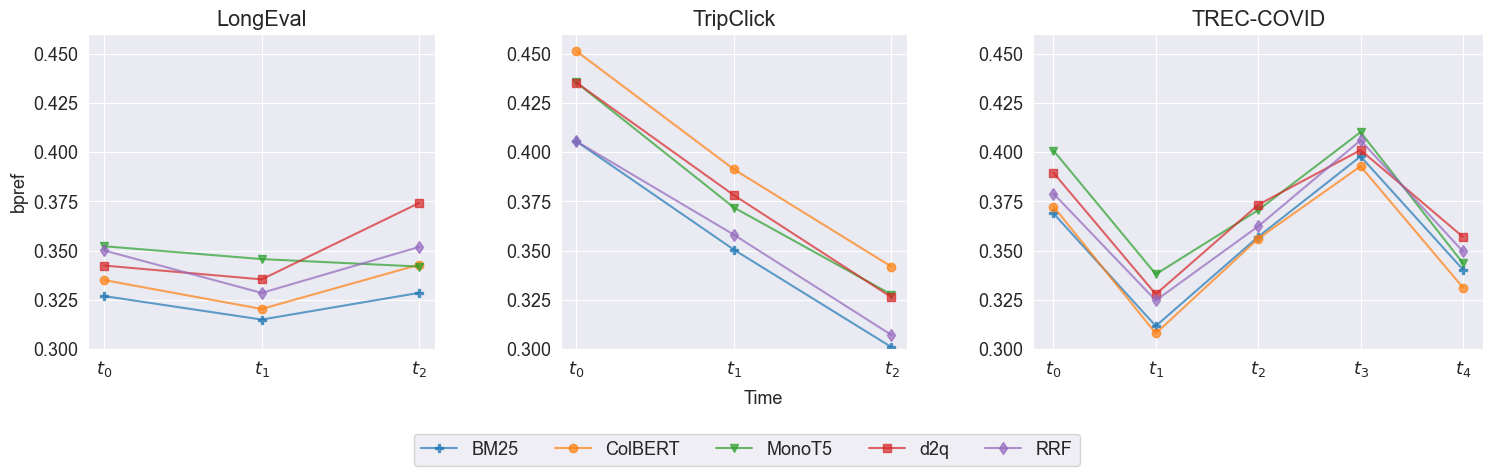

In [5]:
plot_arp_all(df)

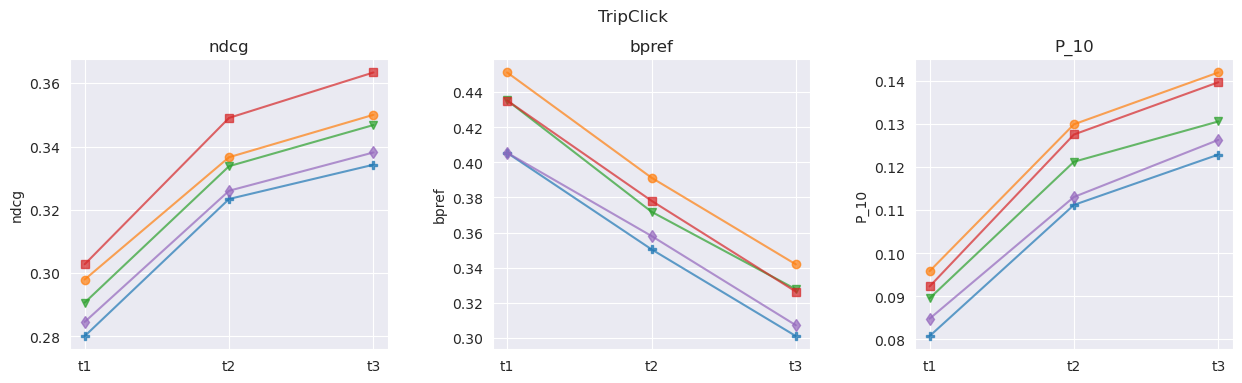

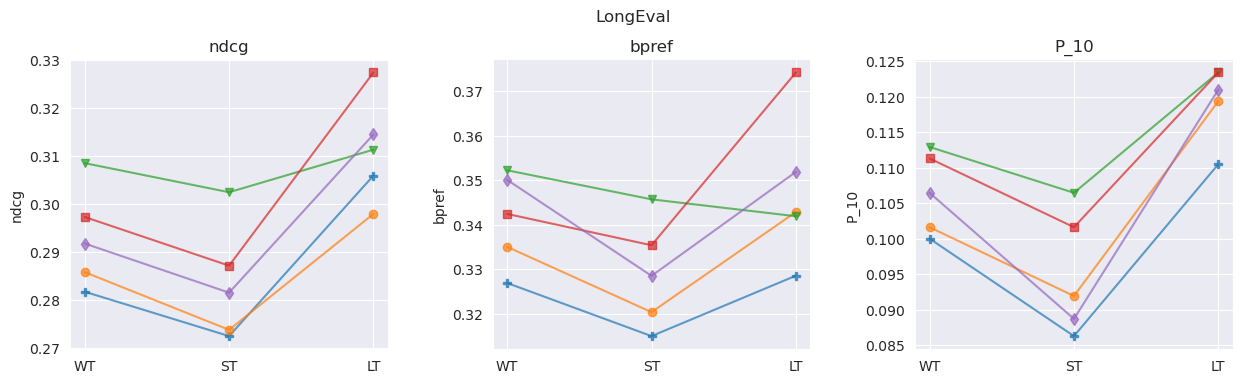

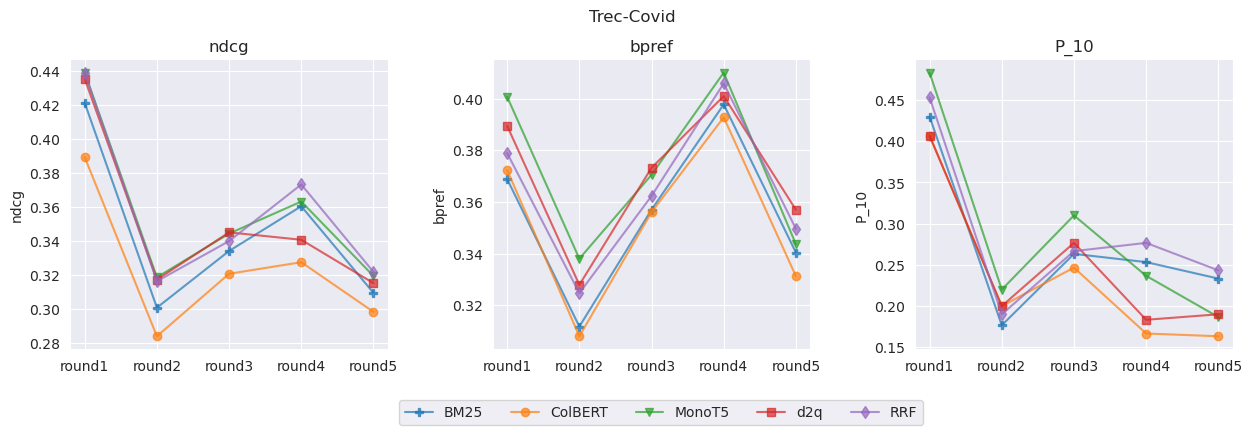

In [ ]:
plot_arp(df, "tripclick-test-head", title="TripClick")
plot_arp(df, "longeval", title="LongEval", sorted_columns=["WT", "ST", "LT"])
plot_arp(df, "trec-covid", title="Trec-Covid", legend=True)

# Differences between ARP scores per EE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


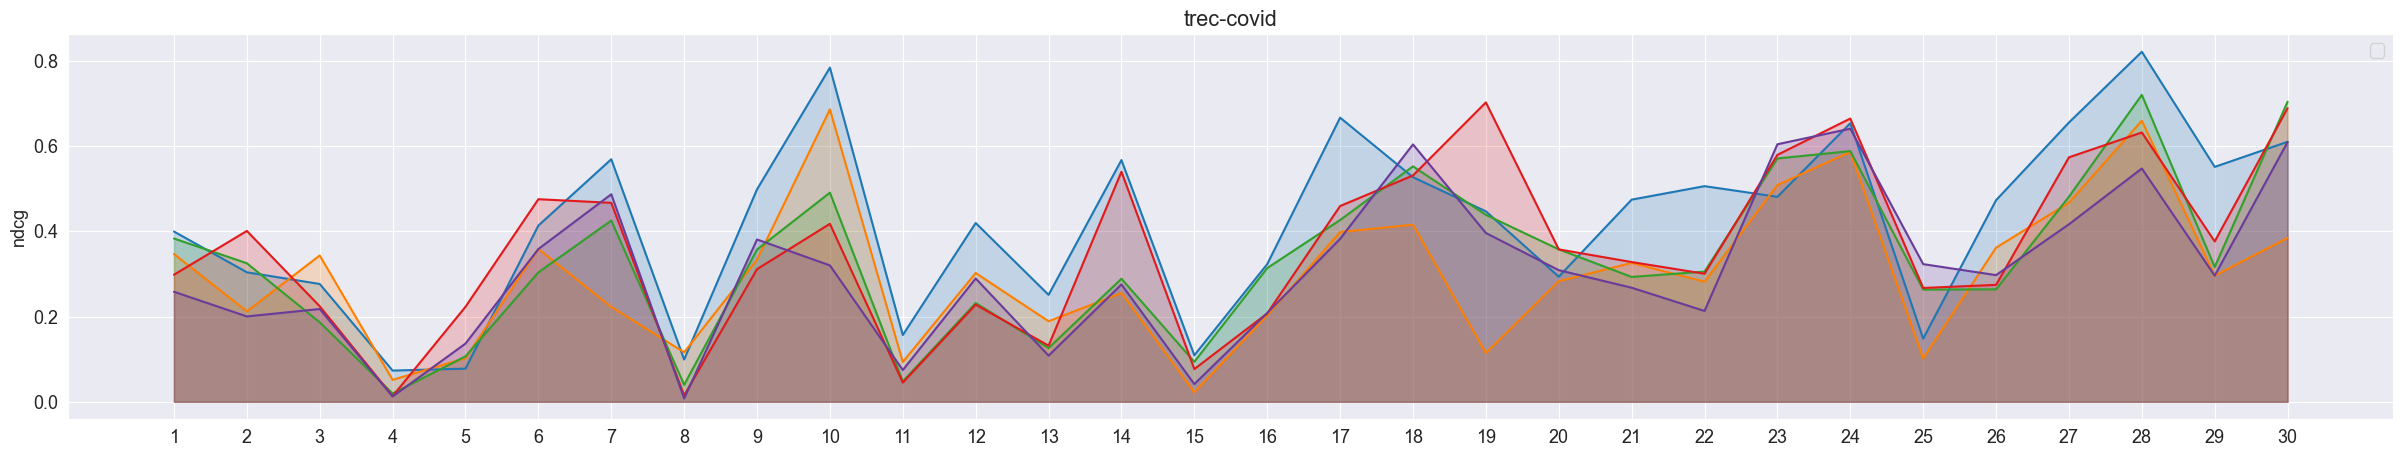

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


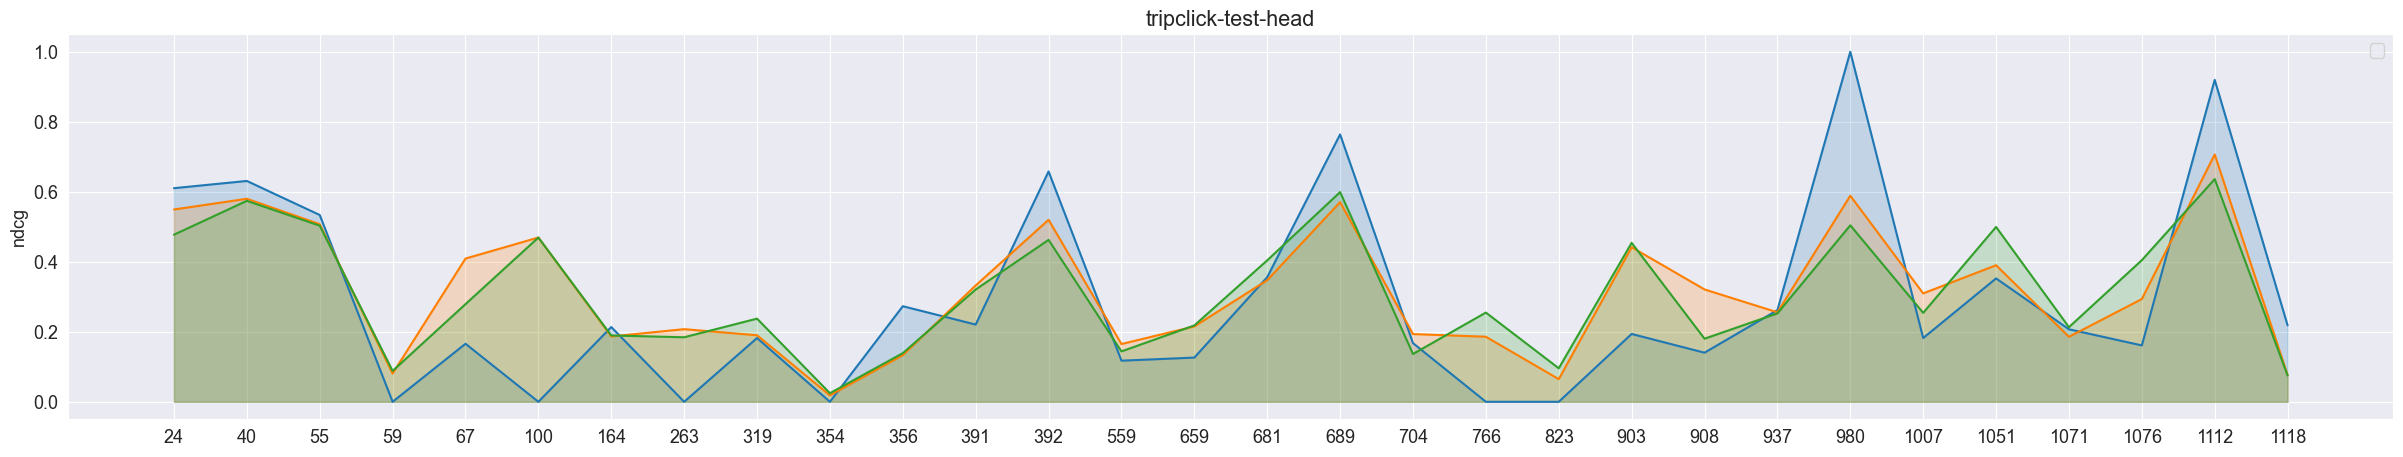

In [6]:
plot_per_topic_dif(df, "trec-covid", "bm25", "ndcg", subcollections = ["round1", "round2", "round3", "round4", "round5"])
plot_per_topic_dif(df, "tripclick-test-head", "bm25", "ndcg", subcollections=["t1", "t2", "t3"], cut_off=30)

# Delta score plots

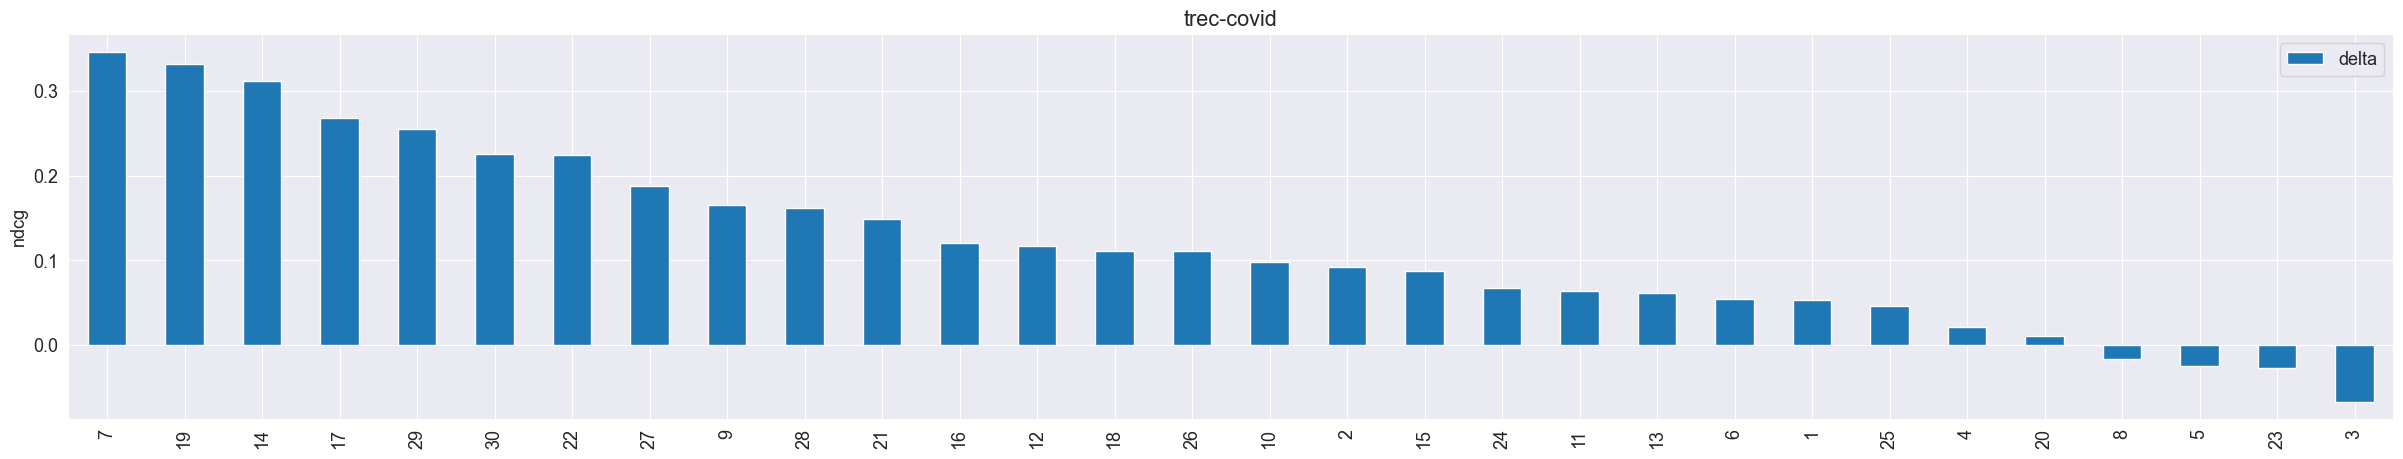

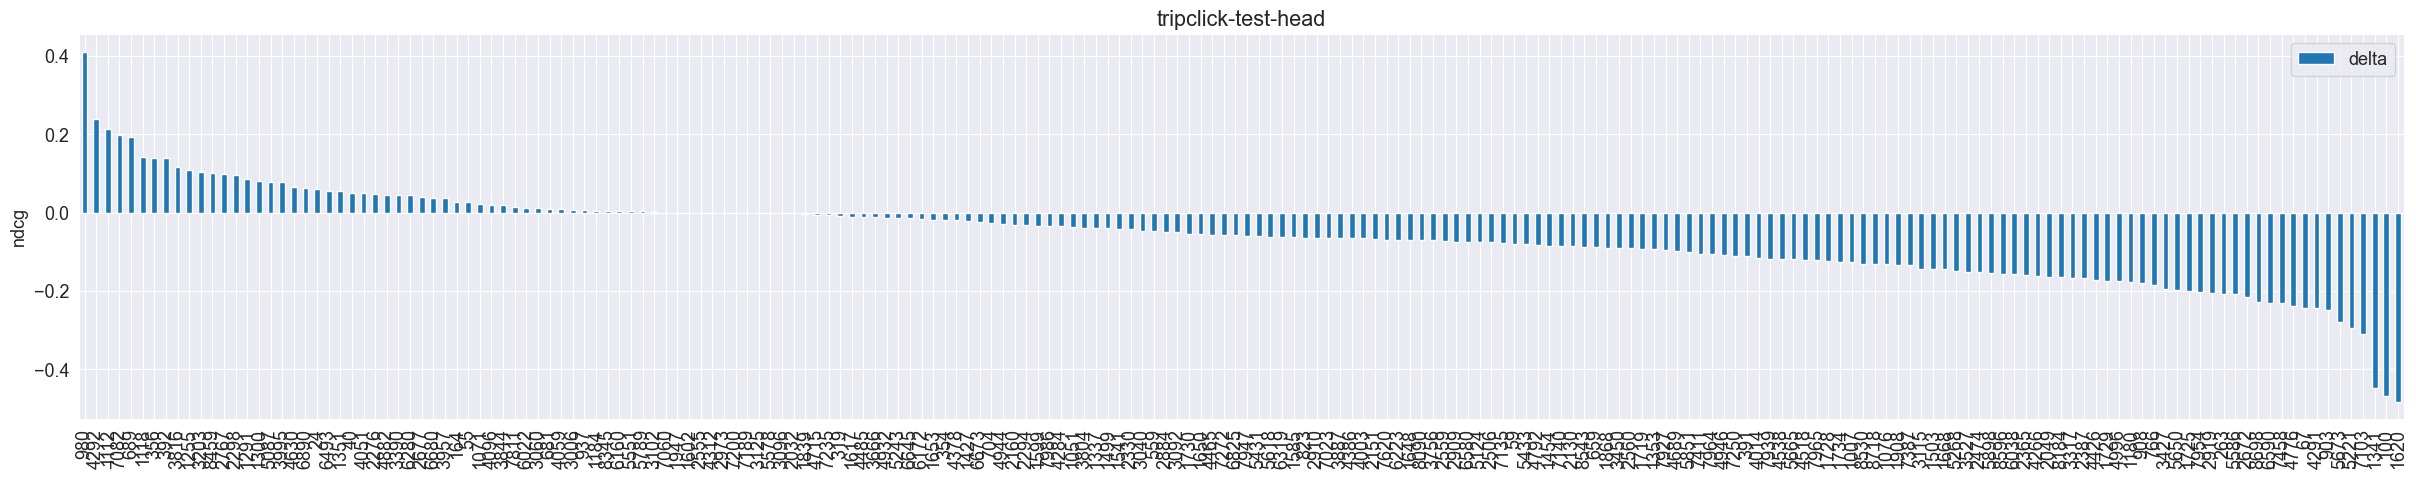

In [8]:
plot_per_topic_delta(df, "trec-covid", "bm25", "ndcg", subcollections = ["round1", "round2"], cut_off=30)
plot_per_topic_delta(df, "tripclick-test-head", "bm25", "ndcg", subcollections=["t1", "t2"], cut_off=200)

# DRI

In [9]:
from adjustText import adjust_text

NameError: name 'long' is not defined

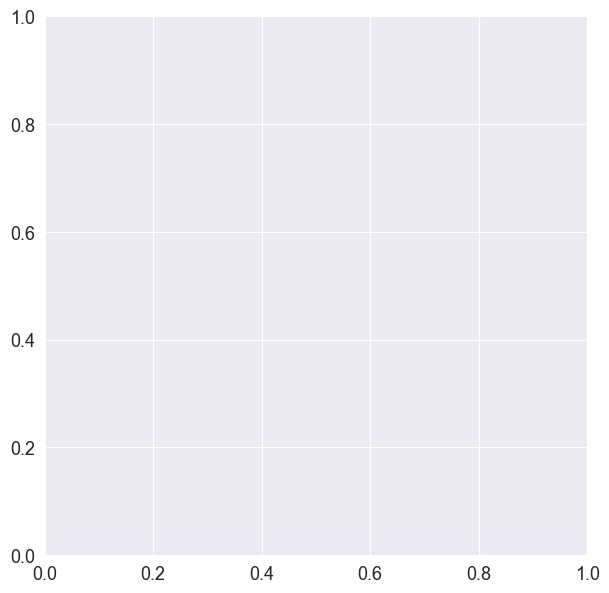

In [10]:
subcollections = ["ST", "LT"]
dataset = "longeval"
measures = ["bpref"]
marker_color = [('o', "#1f78b4"), ('^', '#33a02c'), ('v', '#e31a1b')]
fig, ax = plt.subplots(figsize=(7, 7))
methods = long["method"].unique()

texts = []
for measure, mk in zip(measures, marker_color[:1]):
    for method in methods[1:]:  # we have 4 systems
            x = []
            y = []
            name = []
            for subcollection in subcollections:
                # data
                d = long[(long["dataset"] == dataset)&(long["measure"]==measure)&(long["group"]=="ER")&(long["subcollection"]==subcollection)&(long["method"]==method)]["value"].clip(0,2)
                x.append(d.values)

                d = long[(long["dataset"] == dataset)&(long["measure"]==measure)&(long["group"]=="DRI")&(long["subcollection"]==subcollection)&(long["method"]==method)]["value"].clip(-0.1,0.1)
                y.append(d.values)
                
                # label
                name.append(method + " " + subcollection)


            # plot data        
            ax.plot(x, y, marker=mk[0], color=mk[1], linestyle=':', label=measure)

            for x_cord, y_cord, system_name in zip(x, y, name):
                texts.append(ax.text(x_cord, y_cord, system_name, fontsize=12))
                



# style
ax.tick_params(axis='y', labelcolor='k')
ax.axhline(0, color='grey')  
ax.axvline(1, color='grey')

ax.grid(False)  # disable grid
ax.set_xlabel('Effect Ratio (ER)')
ax.set_ylabel(u'Delta Relative Improvement ($\Delta$RI)')


ax.set_ylim(-0.1,0.1)
ax.set_xlim(0,2)

ax.legend(loc='lower left')
ax.set_title(f'{dataset} {subcollection}\n')
_ = adjust_text(texts, ax=ax)

plt.show()

In [ ]:
plt.rcParams.update({'font.size': 16})
def plot_ER_DRI_multi(subcollections, methods=["bm25+colbert"], measures = ['P_10', 'bpref', 'ndcg']):
    marker_color = [('o', "#1f78b4"), ('^', '#33a02c'), ('v', '#e31a1b')][:len(measures)]

    fig, ax1 = plt.subplots(figsize=(7, 7))

    # style
    ax1.tick_params(axis='y', labelcolor='k')
    ax1.axhline(0, color='grey')  
    ax1.axvline(1, color='grey')

    ax1.grid(False)  # disable grid
    ax1.set_xlabel('Effect Ratio (ER)')
    ax1.set_ylabel(u'Delta Relative Improvement ($\Delta$RI)')

    dataset = runs_a_rep[runs_a_rep["subcollection"]==subcollections[0]]["dataset"].iloc[0]
    ax1.set_title(f'{dataset} over {" ".join(subcollections)}\n')

    ax1.set_ylim(-0.1,0.1)
    ax1.set_xlim(0,2)

    # Plot
    texts = []
    for measure, mk in zip(measures, marker_color):
        for method in methods:  # we have 4 systems
            x = []
            y = []
            name = []
            for subcollection in subcollections:
                # data
                d = runs_a_rep[runs_a_rep["subcollection"]==subcollection].set_index("method")[f"ER_{measure}"].clip(0,2)
                x.append(d[method])
                d = runs_a_rep[runs_a_rep["subcollection"]==subcollection].set_index("method")[f"DRI_{measure}"].clip(-0.1,0.1)
                y.append(d[method])
                
                # label
                name.append(r_patch[method] + " " + subcollection)

            # plot data        
            ax1.plot(x, y, marker=mk[0], color=mk[1], linestyle=':', label=measure)

            # plot label
            for x_cord, y_cord, system_name in zip(x, y, name):
                texts.append(ax1.text(x_cord, y_cord, system_name,color=mk[1], fontsize=12))
                
        
    _ = adjust_text(texts, ax=ax1)

    # plt.savefig(f"../paper/figures/ER_DRI_multi_{dataset}-{subcollection}.pdf", bbox_inches='tight')
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


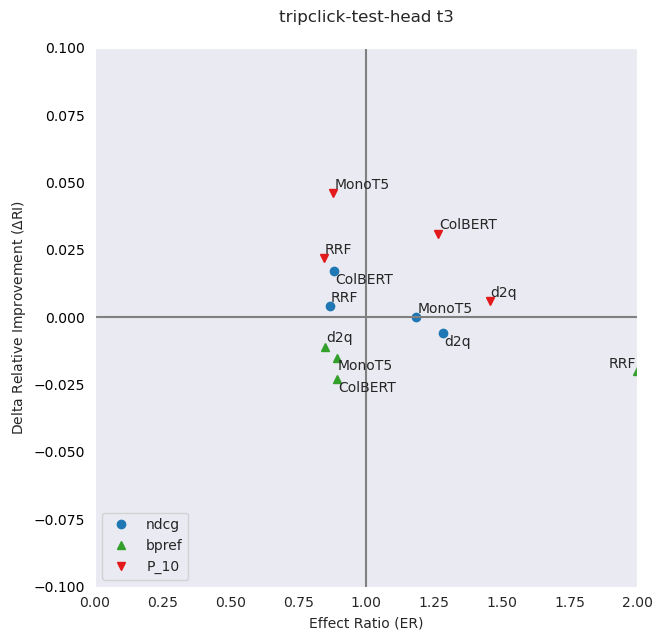

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


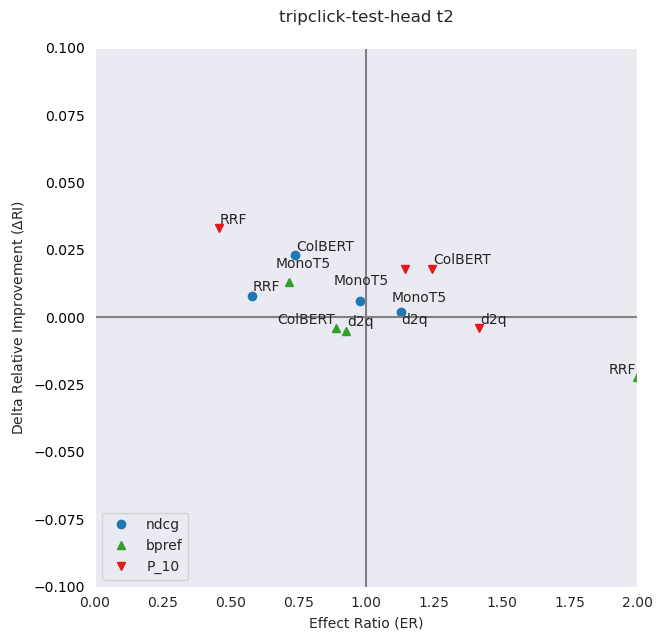

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


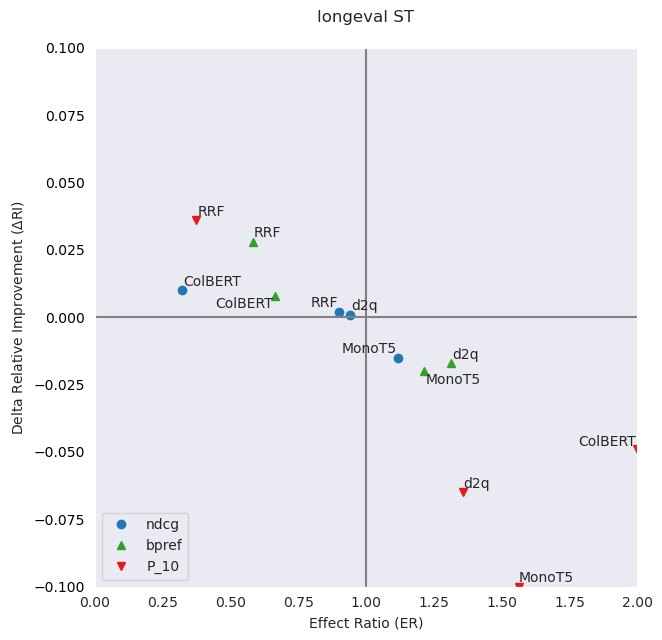

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


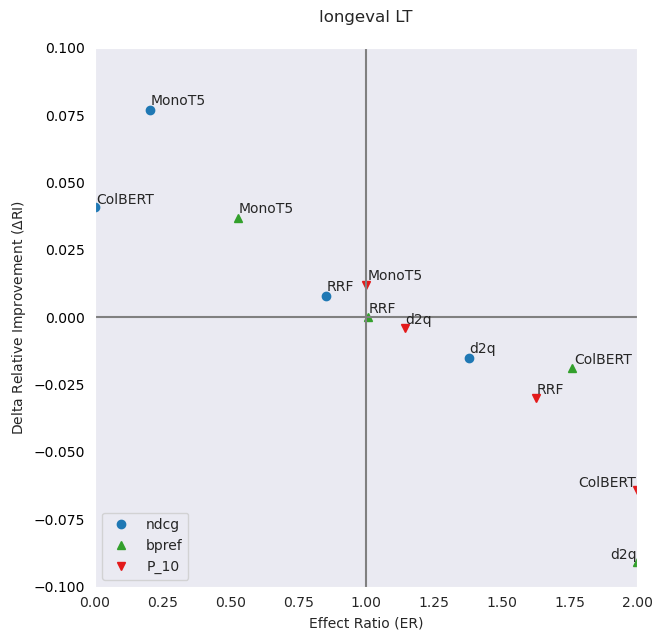

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


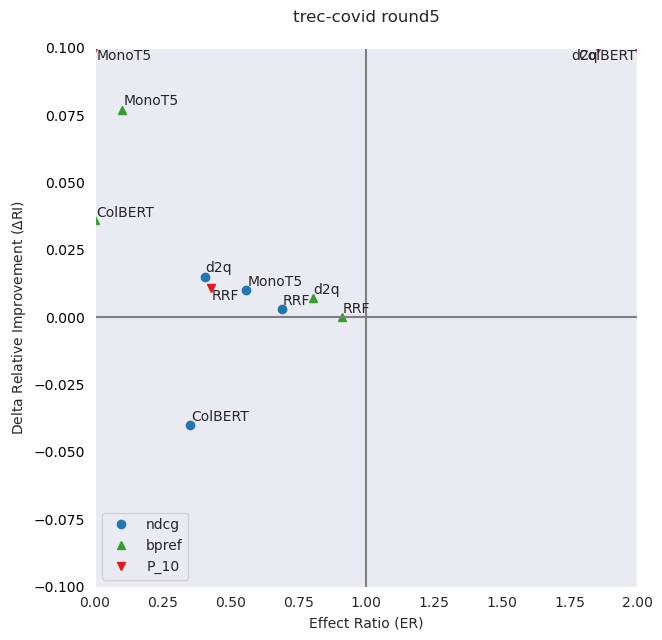

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


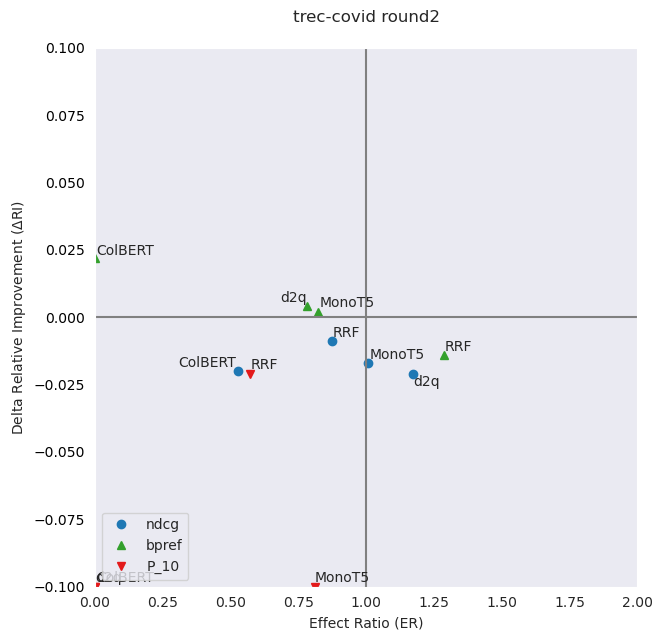

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


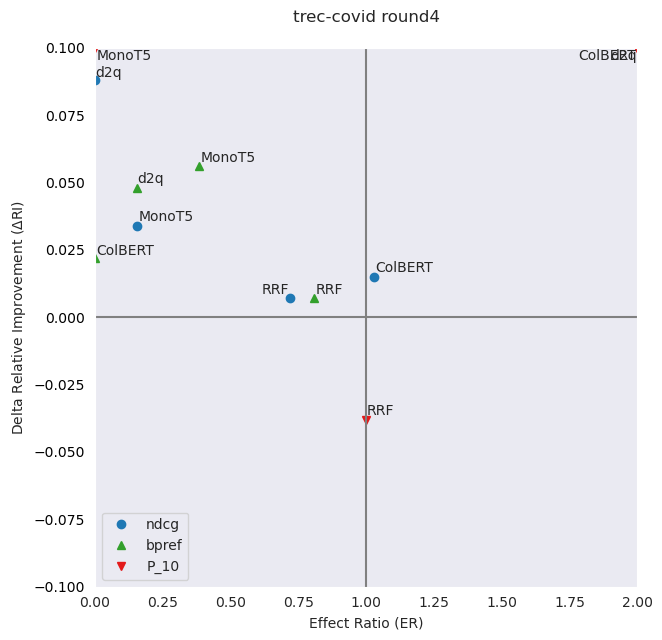

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


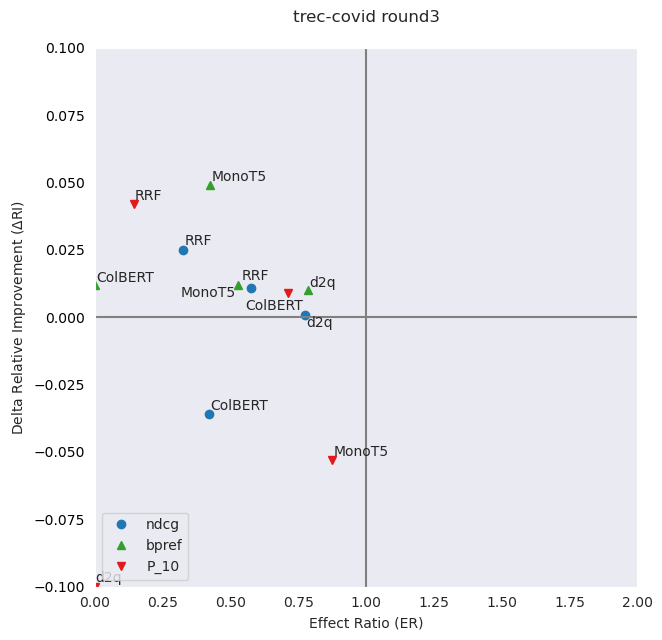

In [ ]:
plot_DRI_ER(long)

In [10]:
plt.rcParams.update({'font.size': 16})
def plot_ER_DRI_multi(subcollections, methods=["bm25+colbert"], measures = ['P_10', 'bpref', 'ndcg']):
# subcollections = ["ST", "LT"]
# methods=["bm25+monot5", "bm25_d2q10"]
# measures = ['P_10', 'bpref', 'ndcg']

    marker_color = [('o', "#1f78b4"), ('^', '#33a02c'), ('v', '#e31a1b')][:len(measures)]

    fig, ax1 = plt.subplots(figsize=(7, 7))

    # style
    ax1.tick_params(axis='y', labelcolor='k')
    ax1.axhline(0, color='grey')  
    ax1.axvline(1, color='grey')

    ax1.grid(False)  # disable grid
    ax1.set_xlabel('Effect Ratio (ER)')
    ax1.set_ylabel(u'Delta Relative Improvement ($\Delta$RI)')

    dataset = runs_a_rep[runs_a_rep["subcollection"]==subcollections[0]]["dataset"].iloc[0]
    ax1.set_title(f'{dataset} over {" ".join(subcollections)}\n')

    ax1.set_ylim(-0.1,0.1)
    ax1.set_xlim(0,2)

    # Plot
    texts = []
    for measure, mk in zip(measures, marker_color):
        for method in methods:  # we have 4 systems
            x = []
            y = []
            name = []
            for subcollection in subcollections:
                # data
                d = runs_a_rep[runs_a_rep["subcollection"]==subcollection].set_index("method")[f"ER_{measure}"].clip(0,2)
                x.append(d[method])
                d = runs_a_rep[runs_a_rep["subcollection"]==subcollection].set_index("method")[f"DRI_{measure}"].clip(-0.1,0.1)
                y.append(d[method])
                
                # label
                name.append(r_patch[method] + " " + subcollection)

            # plot data        
            ax1.plot(x, y, marker=mk[0], color=mk[1], linestyle=':', label=measure)

            # plot label
            for x_cord, y_cord, system_name in zip(x, y, name):
                texts.append(ax1.text(x_cord, y_cord, system_name,color=mk[1], fontsize=12))
                
        
    _ = adjust_text(texts, ax=ax1)

    # plt.savefig(f"../paper/figures/ER_DRI_multi_{dataset}-{subcollection}.pdf", bbox_inches='tight')
    plt.show()

In [11]:
import matplotlib.pyplot as plt

NameError: name 'runs_a_rep' is not defined

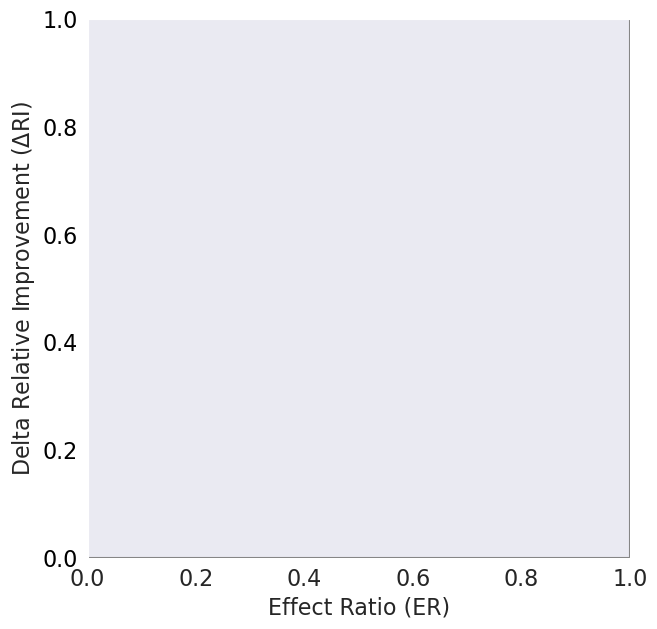

In [12]:
plot_ER_DRI_multi(methods=["bm25+colbert", "rrf(xsqram__bm25_bo1__pl2)", "bm25+monot5", "bm25_d2q10"], subcollections=["t2", "t3"])

# RMSE

In [ ]:
table = df

In [ ]:
runs_b_orig = table[
    (table["subcollection"].isin(["WT", "t1", "round1"]))
    & (table["method"] == "bm25")
]
runs_a_orig = table[
    (table["subcollection"].isin(["WT", "t1", "round1"]))
    & (table["method"] != "bm25")
]

runs_b_rep = table[
    (~table["subcollection"].isin(["WT", "t1", "round1"]))
    & (table["method"] == "bm25")
]
runs_a_rep = table[
    (~table["subcollection"].isin(["WT", "t1", "round1"]))
    & (table["method"] != "bm25")
]

In [ ]:
row = table.iloc[1]
row

dataset                    longeval
subcollection                    ST
queries                        test
method                 bm25+colbert
implementation            pyterrier
                           ...     
RMSE_set_P                 0.001214
RMSE_set_relative_P        0.282617
RMSE_set_recall            0.282617
RMSE_set_map               0.001523
RMSE_set_F                  0.00241
Name: 1, Length: 550, dtype: object

In [ ]:
def get_qrels_name_from_row(row):
    qrels_type = {"tripclick-test-head": "test-head-dctr"}  # tripclick needs mapping

    qrels_name = row.dataset + "-" + row.subcollection + ".qrels"
    if row.queries != "queries":
        qrels_name += "-" + row.queries
    if row.dataset in qrels_type.keys():
        qrels_name += "-" + qrels_type[row.dataset]

    return qrels_name

In [ ]:
from repro_eval.Evaluator import RpdEvaluator, RplEvaluator

In [ ]:
# Original
# get qrel baseline
qrel_orig_path = get_qrels_name_from_row(
    runs_b_orig[runs_b_orig["dataset"] == row["dataset"]].iloc[0]
)
# baseline
run_b_orig_path = runs_b_orig[
    runs_b_orig["dataset"] == row["dataset"]
].iloc[0]["filename"]
# advanced
run_a_orig_path = runs_a_orig[
    (runs_a_orig["dataset"] == row["dataset"])
    & (runs_a_orig["method"] == row["method"])
].iloc[0]["filename"]

# Replicated
# get baseline
run_b_rep_path = runs_b_rep[
    runs_b_rep["subcollection"] == row["subcollection"]
].iloc[0]["filename"]
# get qrel advanced
qrel_rpl_path = get_qrels_name_from_row(row)

In [ ]:
import pytrec_eval
from repro_eval.measure.document_order import ktau_union as ktu, RBO


In [ ]:
mode = "-core_queries"

In [ ]:
qrel_orig_path="../data/qrels/" + qrel_orig_path + mode
run_b_orig_path=f"../data/run{mode}/" + run_b_orig_path
run_a_orig_path=f"../data/run{mode}/" + run_a_orig_path
run_b_rep_path=f"../data/run{mode}/" + run_b_rep_path
run_a_rep_path=f"../data/run{mode}/" + row["filename"]
qrel_rpl_path="../data/qrels/" + qrel_rpl_path + mode

In [ ]:
with open(run_b_rep_path, 'r') as b_run, open(run_a_rep_path, 'r') as a_run:
    run_b_rep = pytrec_eval.parse_run(b_run)
    run_b_rep = {t: run_b_rep[t] for t in sorted(run_b_rep)}
    run_a_rep = pytrec_eval.parse_run(a_run)
    run_a_rep = {t: run_a_rep[t] for t in sorted(run_a_rep)}

In [ ]:
with open(run_b_orig_path, 'r') as b_run, open(run_a_orig_path, 'r') as a_run:
    run_b_orig = pytrec_eval.parse_run(b_run)
    run_b_orig = {t: run_b_orig[t] for t in sorted(run_b_orig)}
    run_a_orig = pytrec_eval.parse_run(a_run)
    run_a_orig = {t: run_a_orig[t] for t in sorted(run_a_orig)}

In [ ]:
run_b_orig_path

'../data/run-core_queries/run-longeval-WT-queries-bm25-pyterrier'

In [ ]:
rpd_eval = RpdEvaluator(
    qrel_orig_path="../data/qrels/" + qrel_orig_path + mode,
    run_b_orig_path=f"../data/run{mode}/" + run_b_orig_path,
    run_a_orig_path=f"../data/run{mode}/" + run_a_orig_path,
    run_b_rep_path=f"../data/run{mode}/" + run_b_rep_path,
    run_a_rep_path=f"../data/run{mode}/" + row["filename"],
    qrel_rpl_path="../data/qrels/" + qrel_rpl_path + mode,
    )


In [ ]:
rpd_eval.trim()
rpd_eval.evaluate()

In [ ]:
rpd_eval.trim(t=10)
rpd_eval.evaluate()

In [ ]:
len(rpd_eval.rbo()["advanced"])

124

In [ ]:
df[df["dataset"]=="longeval"][["RMSE_ndcg_cut_5"]]

,RMSE_ndcg_cut_5
1,NaN
8,NaN
10,NaN
13,NaN
16,NaN
18,NaN
19,NaN
22,NaN
25,NaN
28,NaN


In [ ]:
long[(long["dataset"]=="longeval") & (long["group"]=="RMSE")]

,method,subcollection,dataset,variable,value,group,measure
110936,ColBERT,ST,longeval,RMSE_map,0.098,RMSE,map
110943,RRF,ST,longeval,RMSE_map,0.098,RMSE,map
110945,ColBERT,LT,longeval,RMSE_map,0.097,RMSE,map
110948,MonoT5,ST,longeval,RMSE_map,0.098,RMSE,map
110951,BM25,WT,longeval,RMSE_map,NaN,RMSE,map
...,...,...,...,...,...,...,...
115754,BM25,ST,longeval,RMSE_set_F,NaN,RMSE,set_F
115756,RRF,WT,longeval,RMSE_set_F,NaN,RMSE,set_F
115758,RRF,LT,longeval,RMSE_set_F,0.002,RMSE,set_F
115761,d2q,WT,longeval,RMSE_set_F,NaN,RMSE,set_F


In [ ]:
measure="ndcg"
t = long[(long["subcollection"]=="ST") & (long["group"]=="RMSE") & (long["measure"].str.startswith(f"{measure}_cut")) & (long["method"]!="BM25")].pivot(index="measure", columns="method", values="value")
t["sort"] = t.index.str.extract(r"ndcg_cut_(\d+)").astype(int).values
t = t.sort_values("sort")
t["sort"] = t["sort"].astype(str)
t.set_index("sort", inplace=True)
t = t[["ColBERT", "MonoT5", "d2q", "RRF"]]
t

method,ColBERT,MonoT5,d2q,RRF
sort,,,,
5,0.127,0.119,0.165,0.126
10,0.123,0.120,0.156,0.110
15,0.130,0.125,0.160,0.120
20,0.132,0.123,0.165,0.120
30,0.131,0.128,0.156,0.120
100,0.136,0.133,0.161,0.122
200,0.137,0.137,0.166,0.120
500,0.141,0.138,0.166,0.122
1000,0.141,0.138,0.166,0.127


In [ ]:
def plot_rmse(long, subcollection, measure="ndcg"):
    # Data    
    t = long[(long["subcollection"]==subcollection) & (long["group"]=="RMSE") & (long["measure"].str.startswith(f"{measure}_cut")) & (long["method"]!="BM25")].pivot(index="measure", columns="method", values="value")
    t["sort"] = t.index.str.extract(r"ndcg_cut_(\d+)").astype(int).values
    t = t.sort_values("sort")
    t["sort"] = t["sort"].astype(str)
    t.set_index("sort", inplace=True)
    t = t[["ColBERT", "MonoT5", "d2q", "RRF"]]

    # plot
    plt.figure()
    # plt.rcParams.update({'font.size': 18})

    color_list = ['#ff7f00', '#33a02c', '#e31a1b', "#6a3c9a"]
    # color_list = ['#1f78b4', '#ff7f00', '#33a02c', '#e31a1b', "#6a3c9a", "#dbdbdb"]

    ax = t.plot.line(style='o-', figsize=(10, 6), color=color_list)
    ax.set_title(f"RMSE of nDCG at different cut-offs at {subcollection}")
    ax.set_xlabel('Cut-off values')
    ax.set_ylabel('RMSE')
    ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

    # ax.set_xscale('log')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)  # disable grid
    plt.show()

    # ax.figure.savefig("../paper/figures/RMSE_WT-ST.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

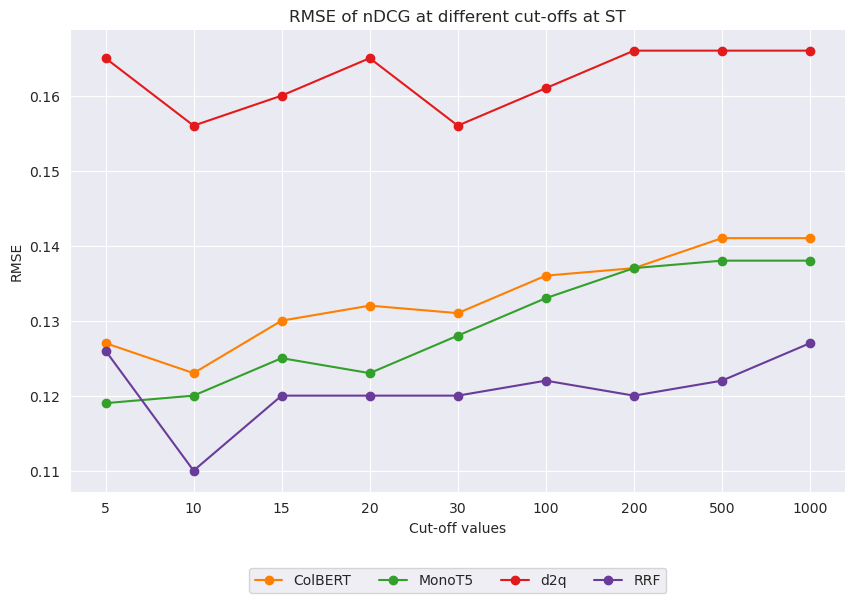

In [ ]:
plot_rmse(long, "ST", measure="ndcg")

<Figure size 640x480 with 0 Axes>

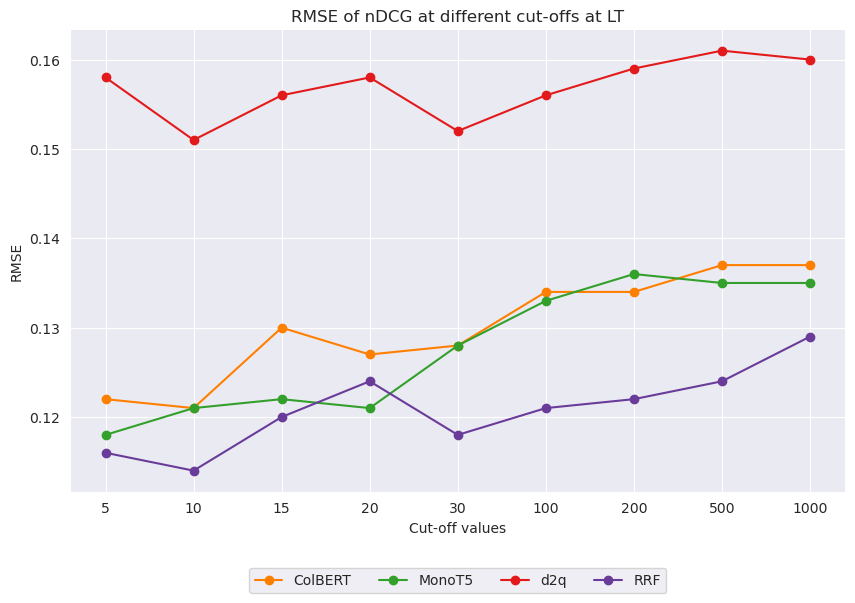

In [ ]:
plot_rmse(long, "LT", measure="ndcg")

<Figure size 640x480 with 0 Axes>

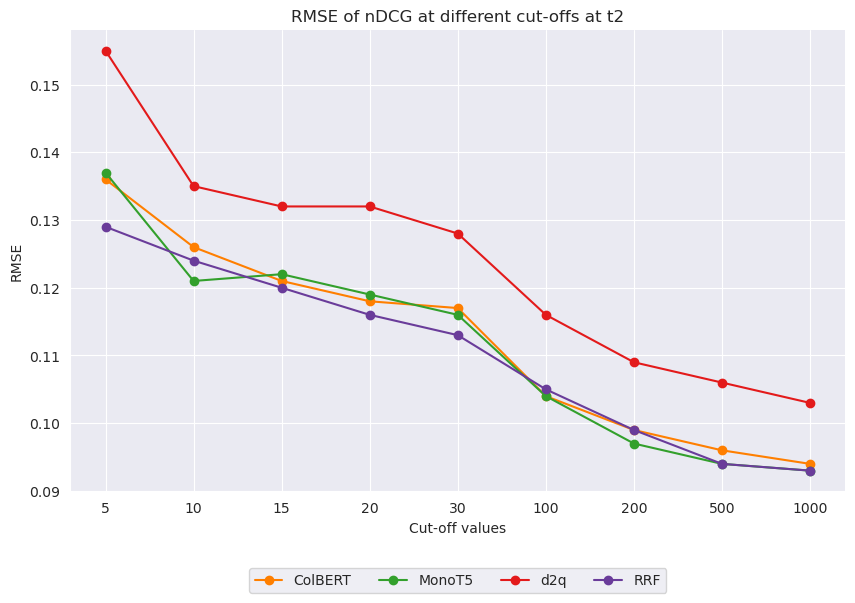

In [ ]:
plot_rmse(long, "t2", measure="ndcg")

<Figure size 640x480 with 0 Axes>

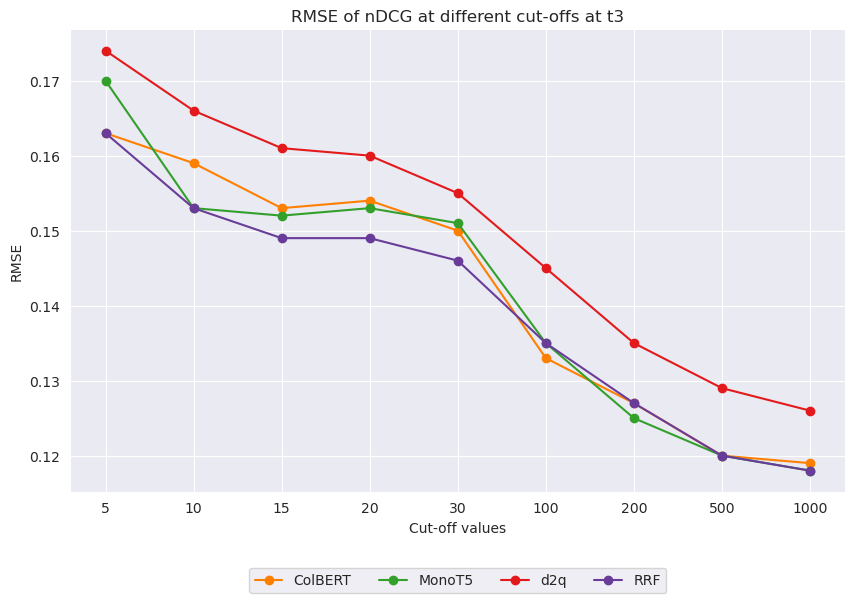

In [ ]:
plot_rmse(long, "t3", measure="ndcg")

<Figure size 640x480 with 0 Axes>

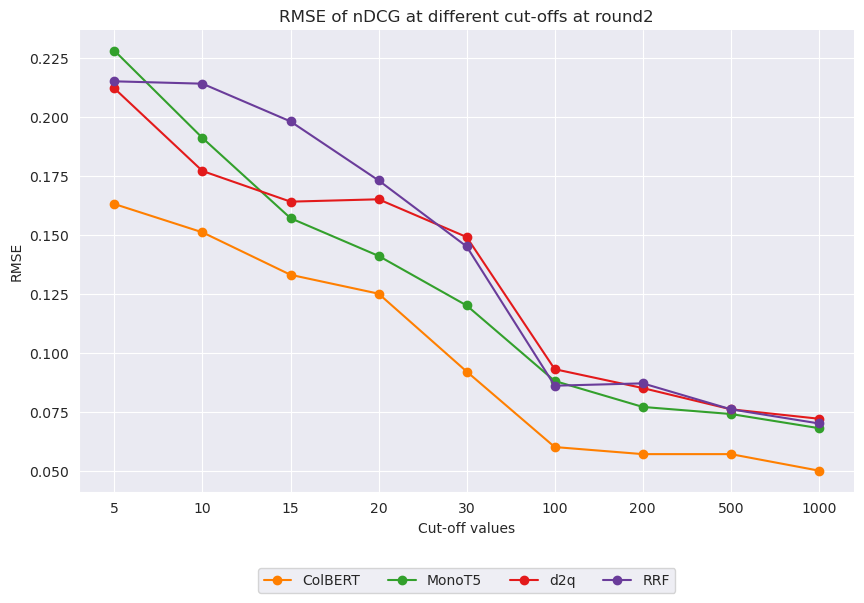

In [ ]:
plot_rmse(long, "round2", measure="ndcg")

<Figure size 640x480 with 0 Axes>

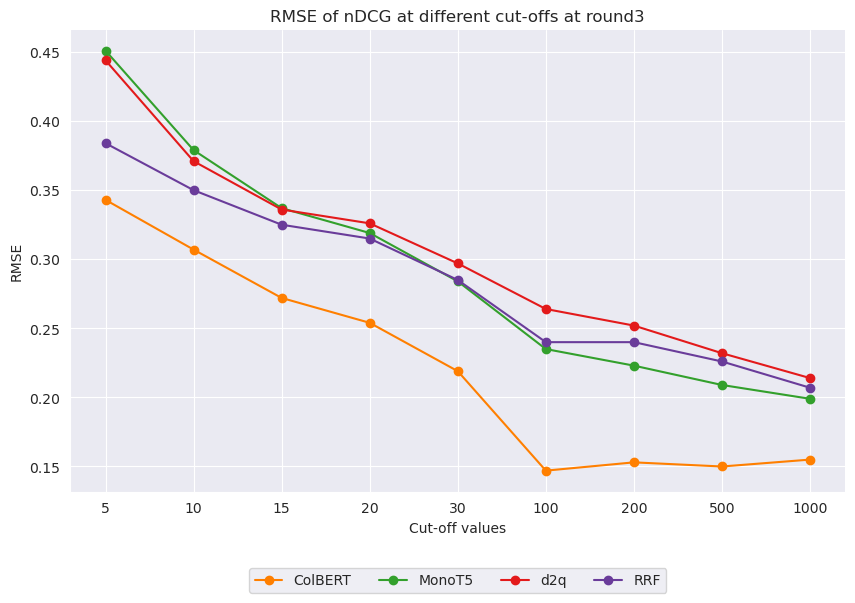

<Figure size 640x480 with 0 Axes>

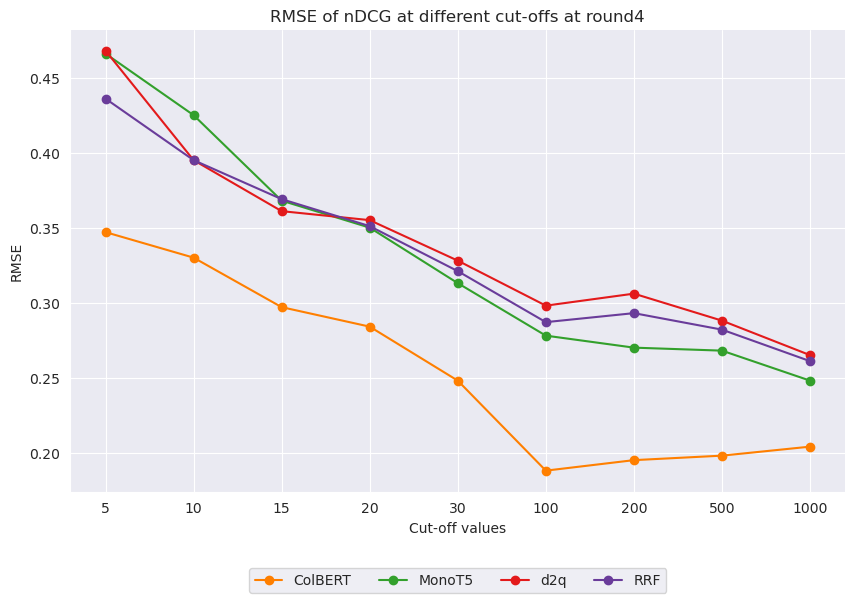

<Figure size 640x480 with 0 Axes>

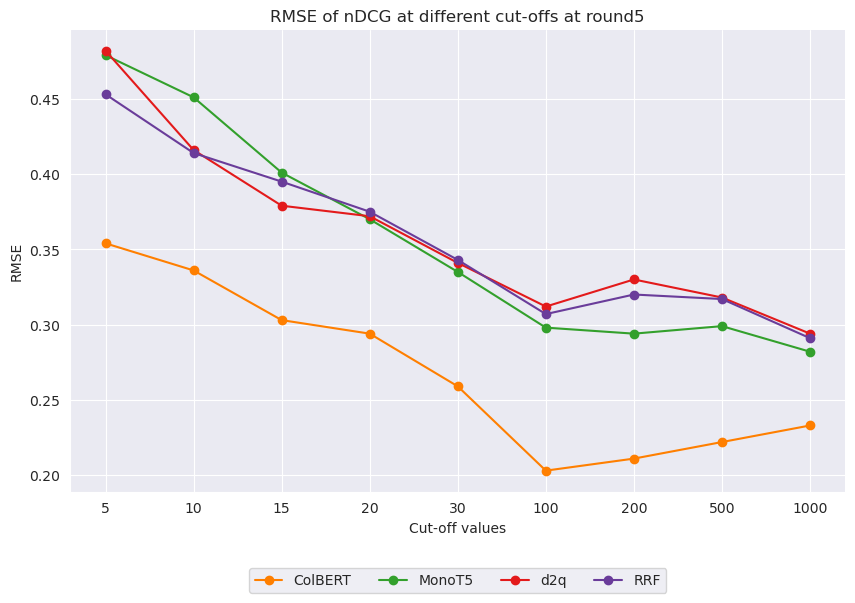

In [ ]:
plot_rmse(long, "round3", measure="ndcg")
plot_rmse(long, "round4", measure="ndcg")
plot_rmse(long, "round5", measure="ndcg")

In [ ]:
subcollection = "ST"
t = long[(long["subcollection"]==subcollection) & (long["group"]=="RBO") & (long["method"]!="BM25")].pivot(index="measure", columns="method", values="value")
t["sort"] = t.index.str.extract(r"rbo_(\d+)").astype(int).values
t = t.sort_values("sort")
t["sort"] = t["sort"].astype(str)
t.set_index("sort", inplace=True)
t = t[["ColBERT", "MonoT5", "d2q", "RRF"]]
t

method,ColBERT,MonoT5,d2q,RRF
sort,,,,
5,0.507,0.506,0.457,0.492
10,0.574,0.573,0.521,0.559
20,0.592,0.593,0.537,0.577
50,0.593,0.594,0.539,0.579
100,0.593,0.594,0.539,0.579
200,0.593,0.594,0.539,0.579


<Figure size 640x480 with 0 Axes>

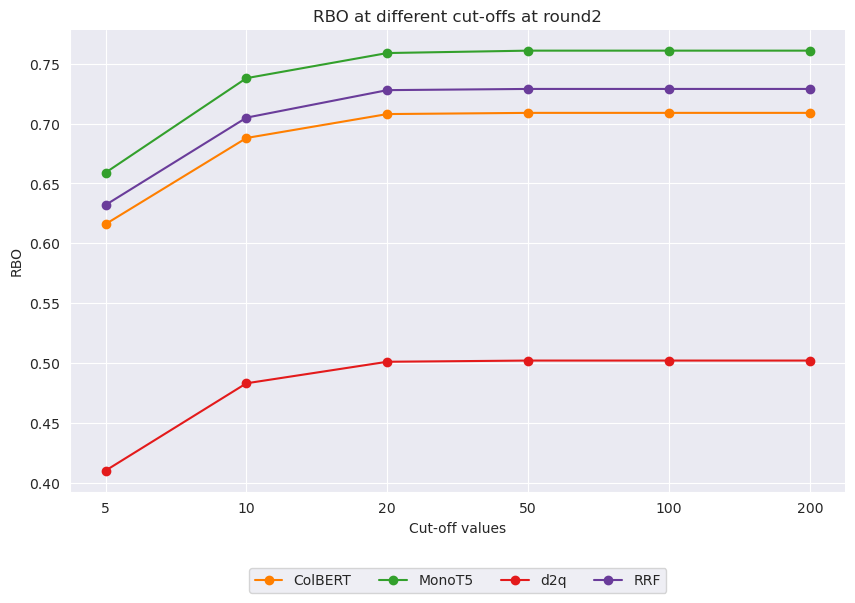

In [ ]:
# def plot_rmse(long, subcollection, measure="ndcg"):
subcollection="round2" 

# Data    
t = long[(long["subcollection"]==subcollection) & (long["group"]=="RBO") & (long["method"]!="BM25")].pivot(index="measure", columns="method", values="value")
t["sort"] = t.index.str.extract(r"rbo_(\d+)").astype(int).values
t = t.sort_values("sort")
t["sort"] = t["sort"].astype(str)
t.set_index("sort", inplace=True)
t = t[["ColBERT", "MonoT5", "d2q", "RRF"]]

# plot
plt.figure()
# plt.rcParams.update({'font.size': 18})

color_list = ['#ff7f00', '#33a02c', '#e31a1b', "#6a3c9a"]
# color_list = ['#1f78b4', '#ff7f00', '#33a02c', '#e31a1b', "#6a3c9a", "#dbdbdb"]

ax = t.plot.line(style='o-', figsize=(10, 6), color=color_list)
ax.set_title(f"RBO at different cut-offs at {subcollection}")
ax.set_xlabel('Cut-off values')
ax.set_ylabel('RBO')
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

# ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True)  # disable grid
plt.show()

# ax.figure.savefig("../paper/figures/RMSE_WT-ST.png", dpi=300, bbox_inches='tight')